## Введение

In [2]:
import pandas as pd
import os
import numpy as np

In [33]:
def from_csv_to_excel(csv_path):
    excel_path = f'{csv_path[:-3]}xlsx'
    print(f'Creating {excel_path}')
    df = pd.read_csv(csv_path)
    df.to_excel(excel_path)

In [32]:
def from_excel_to_csv(excel_path):
    csv_path = f'{excel_path[:-4]}csv'
    print(f'Creating {csv_path}')
    df = pd.read_excel(excel_path)
    df.to_csv(csv_path, index=False)

In [5]:
# print_fixture_content.py

import pandas as pd

path = './data/Orders.xlsx'
df = pd.read_excel(path)
print(df)

  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0        NaN        NaN        NaN        NaN
1     shop_1     shop_2     shop_3     shop_4
2          7          1          7          8
3          4          2          4          5
4          3          5        NaN          3
5          8         12          8          7
6         15         11         13          9
7         21         18         17         21
8        NaN         16         25         17


In [2]:
df_orders = pd.read_csv('data/Shop_orders.csv', index_col=0)

In [4]:
df_orders

,Shop_1,Shop_2,Shop_3,Shop_4
Weekday,,,,
mon,7,1,7,8
tue,4,2,4,5
wed,3,5,2,3
thu,8,12,8,7
fri,15,11,13,9
sat,21,18,17,21
sun,25,16,25,17


In [5]:
df_orders.head()

,Shop_1,Shop_2,Shop_3,Shop_4
Weekday,,,,
mon,7,1,7,8
tue,4,2,4,5
wed,3,5,2,3
thu,8,12,8,7
fri,15,11,13,9


In [6]:
df_orders.describe()

,Shop_1,Shop_2,Shop_3,Shop_4
count,7.000000,7.000000,7.000000,7.000000
mean,11.857143,9.285714,10.857143,10.000000
std,8.610625,6.725927,8.071113,6.557439
min,3.000000,1.000000,2.000000,3.000000
25%,5.500000,3.500000,5.500000,6.000000
50%,8.000000,11.000000,8.000000,8.000000
75%,18.000000,14.000000,15.000000,13.000000
max,25.000000,18.000000,25.000000,21.000000


In [7]:
df_orders.mean()

Shop_1    11.857143
Shop_2     9.285714
Shop_3    10.857143
Shop_4    10.000000
dtype: float64

In [8]:
df_orders_centered = df_orders - df_orders.mean()

In [9]:
df_orders_centered

,Shop_1,Shop_2,Shop_3,Shop_4
Weekday,,,,
mon,-4.857143,-8.285714,-3.857143,-2.0
tue,-7.857143,-7.285714,-6.857143,-5.0
wed,-8.857143,-4.285714,-8.857143,-7.0
thu,-3.857143,2.714286,-2.857143,-3.0
fri,3.142857,1.714286,2.142857,-1.0
sat,9.142857,8.714286,6.142857,11.0
sun,13.142857,6.714286,14.142857,7.0


In [10]:
df_orders_centered.to_csv('data/Shop_orders_centered.csv')

## Использование Pandas для работы с табличными данными

### Чтение данных из файловой системы

In [13]:
# df_clicks = pd.read_csv('./data/Cite_clicks.csv', index_col=0)
df_clicks = pd.read_json('./data/Cite_clicks.json')

In [15]:
df_clicks.head()

,day,SHOP1,SHOP2,SHOP3,SHOP4
0,1,319.0,-265.0,319.0,328.0
1,2,292.0,274.0,292.0,301.0
2,3,283.0,301.0,274.0,283.0
3,4,328.0,364.0,328.0,NaN
4,5,391.0,355.0,373.0,337.0


In [16]:
type(df_clicks)

pandas.core.frame.DataFrame

In [17]:
df_clicks.tail()

,day,SHOP1,SHOP2,SHOP3,SHOP4
23,24,295.0,321.0,282.0,NaN
24,25,360.0,412.0,360.0,347.0
25,26,NaN,399.0,425.0,373.0
26,27,529.0,490.0,477.0,529.0
27,28,581.0,464.0,581.0,-477.0


In [18]:
df_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     28 non-null     int64  
 1   SHOP1   26 non-null     float64
 2   SHOP2   27 non-null     float64
 3   SHOP3   26 non-null     float64
 4   SHOP4   26 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [19]:
df_clicks.describe()

,day,SHOP1,SHOP2,SHOP3,SHOP4
count,28.000000,26.000000,27.000000,26.000000,26.000000
mean,14.500000,356.269231,362.777778,351.692308,363.115385
std,8.225975,173.269630,140.950983,191.599326,187.080587
min,1.000000,-390.000000,-265.000000,-495.000000,-477.000000
25%,7.750000,312.250000,330.500000,319.250000,329.750000
50%,14.500000,360.000000,385.000000,362.500000,377.500000
75%,21.250000,446.250000,432.500000,441.250000,461.250000
max,28.000000,581.000000,490.000000,581.000000,529.000000


In [20]:
df_clicks.columns

Index(['day', 'SHOP1', 'SHOP2', 'SHOP3', 'SHOP4'], dtype='object')

In [22]:
df_clicks.columns = ['day', 'shop_1', 'shop_2', 'shop_3', 'shop_4']

In [23]:
df_clicks

,day,shop_1,shop_2,shop_3,shop_4
0,1,319.0,-265.0,319.0,328.0
1,2,292.0,274.0,292.0,301.0
2,3,283.0,301.0,274.0,283.0
3,4,328.0,364.0,328.0,NaN
4,5,391.0,355.0,373.0,337.0
5,6,310.0,320.0,298.0,315.0
6,7,325.0,340.0,325.0,335.0
7,8,290.0,270.0,285.0,300.0
8,9,305.0,310.0,320.0,305.0
9,10,330.0,355.0,340.0,360.0


<Axes: >

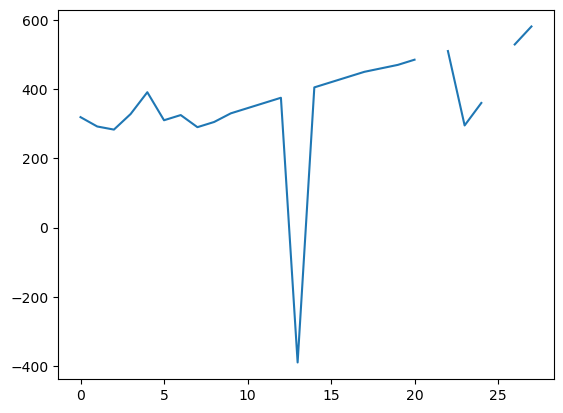

In [27]:
df_clicks['shop_1'].plot()

In [29]:
df_clicks = df_clicks.fillna(0)
df_clicks = df_clicks.abs()

In [30]:
df_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     28 non-null     int64  
 1   shop_1  28 non-null     float64
 2   shop_2  28 non-null     float64
 3   shop_3  28 non-null     float64
 4   shop_4  28 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [41]:
df_clicks[['shop_1', 'shop_2', 'shop_3', 'shop_4']]

,shop_1,shop_2,shop_3,shop_4
0,319.0,265.0,319.0,328.0
1,292.0,274.0,292.0,301.0
2,283.0,301.0,274.0,283.0
3,328.0,364.0,328.0,0.0
4,391.0,355.0,373.0,337.0
5,310.0,320.0,298.0,315.0
6,325.0,340.0,325.0,335.0
7,290.0,270.0,285.0,300.0
8,305.0,310.0,320.0,305.0
9,330.0,355.0,340.0,360.0


In [42]:
df_clicks['mean'] = df_clicks[['shop_1', 'shop_2', 'shop_3', 'shop_4']].mean(axis=1)

In [28]:
df_clicks.head()

NameError: name 'df_clicks' is not defined

In [44]:
df_clicks.to_csv('./data/Cite_clicks_analyzed.csv')
df_clicks.to_json('./data/Cite_clicks_analyzed.json')
df_clicks.to_excel('./data/Cite_clicks_analyzed.xlsx')

### Упражнения

In [32]:
orders_path = './data/Orders.csv'
# orders_path = './data/Orders.xlsx'
ORDERS_PATH = './data/Orders.xlsx'

df_orders = pd.read_csv(orders_path)
# df_orders = pd.read_excel(orders_path)

In [33]:
df_orders.head()

,shop1,shOp_2,shoP_3,SHOP4
0,NaN,-265.0,319.0,Nan
1,292.0,NaN,292.0,301.0
2,305.0,290.0,310.0,315.0
3,330.0,310.0,320.0,340.0
4,350.0,330.0,NaN,360.0


In [36]:
def rename_columns(df: pd.core.frame.DataFrame, column_prefix='shop'):
    df.columns = [f'{column_prefix}_{i}' for i in range(1, len(df.columns) + 1)]

    
def fillna_values(df: pd.core.frame.DataFrame, value=0):
    return df.fillna(value)

    
def etl(path, value=1):
    df = pd.read_excel(path)
    df = fillna_values(df, value)
    
    print(df)
    
    dirname = os.path.dirname(path)
    basename = os.path.splitext(os.path.basename(path))[0]
    etl_csv_name = f'{basename}_etl.csv'
    etl_excel_name = f'{basename}_etl.xlsx'
    etl_csv_path = os.path.join(dirname, etl_csv_name)
    etl_excel_path = os.path.join(dirname, etl_excel_name)
    df.to_csv(etl_csv_path, index=False)
    df.to_excel(etl_excel_path, index=False)

In [35]:
etl(ORDERS_PATH)

    shop_1  shop_2  shop_3  shop_4
0      1.0  -265.0   319.0     1.0
1    292.0     1.0   292.0   301.0
2    305.0   290.0   310.0   315.0
3    330.0   310.0   320.0   340.0
4    350.0   330.0     1.0   360.0
5    370.0   350.0   360.0   380.0
6    390.0   370.0   380.0   400.0
7    410.0   390.0     1.0   420.0
8    430.0   410.0   420.0   440.0
9    450.0     1.0   440.0     1.0
10   470.0   450.0   460.0   480.0
11   490.0   470.0   480.0   500.0


In [92]:
# Версия Hexlet'а

def rename_columns(df):
    df.columns = [f'shop_{i}' for i in range(1, len(df.columns) + 1)]


def fillna_values(df, val=0):
    df.fillna(val)


def etl(orders_path):
    df = pd.read_excel(orders_path)
    fillna_values(df, 1)
    rename_columns(df)

    dir_path = '/'.join(orders_path.split('/')[:-1])
    etl_csv_path = os.path.join(dir_path, 'Orders_etl.csv')
    etl_xlsx_path = os.path.join(dir_path, 'Orders_etl.xlsx')

    df.to_csv(etl_csv_path)
    df.to_excel(etl_xlsx_path)

In [91]:
etl(ORDERS_PATH)

## Чтение и запись табличных данных в файловую систему 

In [95]:
df_orders = pd.read_csv('./data/Shop_orders.csv', index_col=0)

In [96]:
df_orders

,Shop_1,Shop_2,Shop_3,Shop_4
Weekday,,,,
mon,7,1,7,8
tue,4,2,4,5
wed,3,5,2,3
thu,8,12,8,7
fri,15,11,13,9
sat,21,18,17,21
sun,25,16,25,17


In [99]:
df_orders = pd.read_csv('./data/Shop_orders_abstract.csv', index_col=0, skiprows=3)

In [100]:
df_orders

,Shop_1,Shop_2,Shop_3,Shop_4
Weekday,,,,
mon,7,1,7,8
tue,4,2,4,5
wed,3,5,2,3
thu,8,12,8,7
fri,15,11,13,9
sat,21,18,17,21
sun,25,16,25,17


In [102]:
df_orders.to_csv('./data/Shop_orders_restore_sep.csv', sep=';')

In [103]:
df_orders.to_csv(
    './data/Shop_orders_restore.zip',
    index=False,
    compression={'method': 'zip', 'archive_name': 'Shop_orders_restore_archive.csv'}
)


df_orders

### Упражнение

In [76]:
ORDERS_PATH = './data/Orders.xlsx'

In [64]:
import pandas as pd

ORDERS_PATH = './data/Orders.xlsx'
df = pd.read_csv(ORDERS_PATH)

print(df)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 41: invalid start byte

In [43]:
from_csv_to_excel('./data/Orders.csv')

Creating ./data/Orders.xlsx


In [69]:
def read_data(path):
    return pd.read_excel(path, skiprows=2)


def fillna_values(df: pd.core.frame.DataFrame, value=0):
    return df.fillna(value)


def etl(excel_path):
    df = read_data(excel_path)
    df = fillna_values(df)

    etl_csv_path = f'{excel_path[:-5]}_etl.csv'
    df.to_csv(etl_csv_path, index=False, header=False)

In [61]:
read_data(ORDERS_PATH)

,shop_1,shop_2,shop_3,shop_4
0,7.0,1,7.0,8
1,4.0,2,4.0,5
2,3.0,5,NaN,3
3,8.0,12,8.0,7
4,15.0,11,13.0,9
5,21.0,18,17.0,21
6,NaN,16,25.0,17


In [75]:
etl(ORDERS_PATH)

## Работа с индексами

In [16]:
df_orders = pd.read_excel('./data/Orders.xlsx')
df_orders

,shop_1,shop_2,shop_3,shop_4
0,7.0,1,7.0,8
1,4.0,2,4.0,5
2,3.0,5,NaN,3
3,8.0,12,8.0,7
4,15.0,11,13.0,9
5,21.0,18,17.0,21
6,NaN,16,25.0,17


In [79]:
type(df_orders['shop_1'])

pandas.core.series.Series

In [80]:
type(df_orders.columns)

pandas.core.indexes.base.Index

In [82]:
df_orders.shop_2

0     1
1     2
2     5
3    12
4    11
5    18
6    16
Name: shop_2, dtype: int64

In [96]:
df_orders[['shop_1', 'shop_2']]

,shop_1,shop_2
0,7.0,1
1,4.0,2
2,3.0,5
3,8.0,12
4,15.0,11
5,21.0,18
6,NaN,16


In [86]:
type(df_orders[['shop_1', 'shop_2']])

pandas.core.frame.DataFrame

In [89]:
type(df_orders[['shop_1', 'shop_2']]) == type(df)

True

In [97]:
df_orders.drop(['shop_4'], axis=1)

,shop_1,shop_2,shop_3
0,7.0,1,7.0
1,4.0,2,4.0
2,3.0,5,NaN
3,8.0,12,8.0
4,15.0,11,13.0
5,21.0,18,17.0
6,NaN,16,25.0


In [100]:
df_orders.index

RangeIndex(start=0, stop=7, step=1)

In [101]:
df_orders.index.name

In [102]:
df_orders.index = ['a','b','c','d','e','f','g']

In [103]:
df_orders

,shop_1,shop_2,shop_3,shop_4
a,7.0,1,7.0,8
b,4.0,2,4.0,5
c,3.0,5,NaN,3
d,8.0,12,8.0,7
e,15.0,11,13.0,9
f,21.0,18,17.0,21
g,NaN,16,25.0,17


In [104]:
df_orders.loc['b']

shop_1    4.0
shop_2    2.0
shop_3    4.0
shop_4    5.0
Name: b, dtype: float64

In [105]:
df_orders.loc[['b','c']]

,shop_1,shop_2,shop_3,shop_4
b,4.0,2,4.0,5
c,3.0,5,NaN,3


In [107]:
df_orders.iloc[[5,6]]

,shop_1,shop_2,shop_3,shop_4
f,21.0,18,17.0,21
g,NaN,16,25.0,17


In [108]:
df_orders.loc[['b','c'],['shop_2','shop_4']]

,shop_2,shop_4
b,2,5
c,5,3


In [109]:
df_orders.loc['b':'d']

,shop_1,shop_2,shop_3,shop_4
b,4.0,2,4.0,5
c,3.0,5,NaN,3
d,8.0,12,8.0,7


### Упражнения

In [61]:
df_orders

,shop_1,shop_2,shop_3,shop_4
0,7.0,1,7.0,8
1,4.0,2,4.0,5
2,3.0,5,NaN,3
3,8.0,12,8.0,7
4,15.0,11,13.0,9
5,21.0,18,17.0,21
6,NaN,16,25.0,17


In [57]:
def set_index(df):
    df_copy = df.copy()
    df_copy.index = [f'UUID_{i + 1}' for i in df.index]
    return df_copy


def rename_indexes(df, index_name='UUID_indexes'):
    df_copy = df.copy()
    df_copy.index.name = index_name
    return df_copy


def get_rows(df, rows_number=5):
    return df[:rows_number]

In [47]:
df_orders

,shop_1,shop_2,shop_3,shop_4
0,7.0,1,7.0,8
1,4.0,2,4.0,5
2,3.0,5,NaN,3
3,8.0,12,8.0,7
4,15.0,11,13.0,9
5,21.0,18,17.0,21
6,NaN,16,25.0,17


In [48]:
df_orders_uuid = set_index(df_orders)

In [49]:
df_orders_uuid

,shop_1,shop_2,shop_3,shop_4
UUID_1,7.0,1,7.0,8
UUID_2,4.0,2,4.0,5
UUID_3,3.0,5,NaN,3
UUID_4,8.0,12,8.0,7
UUID_5,15.0,11,13.0,9
UUID_6,21.0,18,17.0,21
UUID_7,NaN,16,25.0,17


In [50]:
df_orders_uuid.index.name

In [51]:
df_orders_uuid = rename_indexes(df_orders_uuid)

In [55]:
df_orders_uuid

,shop_1,shop_2,shop_3,shop_4
UUID_indexes,,,,
UUID_1,7.0,1,7.0,8
UUID_2,4.0,2,4.0,5
UUID_3,3.0,5,NaN,3
UUID_4,8.0,12,8.0,7
UUID_5,15.0,11,13.0,9
UUID_6,21.0,18,17.0,21
UUID_7,NaN,16,25.0,17


In [58]:
get_rows(df_orders_uuid)

,shop_1,shop_2,shop_3,shop_4
UUID_indexes,,,,
UUID_1,7.0,1,7.0,8
UUID_2,4.0,2,4.0,5
UUID_3,3.0,5,NaN,3
UUID_4,8.0,12,8.0,7
UUID_5,15.0,11,13.0,9
UUID_6,21.0,18,17.0,21


## Фильтрация значений и подготовка данных для анализа

In [69]:
df_clicks = pd.read_csv('./data/Cite_clicks_week.csv', index_col=0)
df_clicks.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
3,283.0,NaN,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [73]:
df_clicks.loc[1:5]

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
3,283.0,NaN,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [74]:
df_clicks[[True, True, False, True, False, True, False]]

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
4,328.0,364.0,328.0,NaN
6,445.0,-418.0,1409.0,445.0


In [76]:
df_clicks.loc[1:5, ['SHOP1', 'SHOP2']]

,SHOP1,SHOP2
day,,
1,1319.0,-265.0
2,NaN,267.0
3,283.0,NaN
4,328.0,364.0
5,391.0,355.0


In [77]:
df_clicks[['SHOP1', 'SHOP2']]

,SHOP1,SHOP2
day,,
1,1319.0,-265.0
2,NaN,267.0
3,283.0,NaN
4,328.0,364.0
5,391.0,355.0
6,445.0,-418.0
7,481.0,NaN


In [80]:
df_clicks['SHOP1'] > 300

day
1     True
2    False
3    False
4     True
5     True
6     True
7     True
Name: SHOP1, dtype: bool

In [82]:
df_clicks[df_clicks['SHOP1'] > 300]

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0
6,445.0,-418.0,1409.0,445.0
7,481.0,NaN,481.0,409.0


In [83]:
df_clicks.loc[df_clicks['SHOP1'] < 300, ['SHOP1', 'SHOP3']]

,SHOP1,SHOP3
day,,
3,283.0,274.0


In [85]:
df_clicks[df_clicks['SHOP1'].isna()]

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
2,NaN,267.0,333.0,344.0


In [91]:
df_clicks.isna()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,False,False,False,True
2,True,False,False,False
3,False,True,False,False
4,False,False,False,True
5,False,False,False,False
6,False,False,False,False
7,False,True,False,False


In [87]:
df_clicks

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
3,283.0,NaN,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0
6,445.0,-418.0,1409.0,445.0
7,481.0,NaN,481.0,409.0


In [92]:
df_clicks

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
3,283.0,NaN,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0
6,445.0,-418.0,1409.0,445.0
7,481.0,NaN,481.0,409.0


In [93]:
df_clicks[df_clicks.isna().any(axis=1)]

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
3,283.0,NaN,274.0,283.0
4,328.0,364.0,328.0,NaN
7,481.0,NaN,481.0,409.0


In [94]:
df_clicks_mean = df_clicks.mean().mean()
df_clicks_mean

366.9488095238095

In [95]:
df_clicks.fillna(df_clicks_mean)

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.00000,-265.00000,319.0,366.94881
2,366.94881,267.00000,333.0,344.00000
3,283.00000,366.94881,274.0,283.00000
4,328.00000,364.00000,328.0,366.94881
5,391.00000,355.00000,373.0,337.00000
6,445.00000,-418.00000,1409.0,445.00000
7,481.00000,366.94881,481.0,409.00000


In [96]:
df_clicks

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,1319.0,-265.0,319.0,NaN
2,NaN,267.0,333.0,344.0
3,283.0,NaN,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0
6,445.0,-418.0,1409.0,445.0
7,481.0,NaN,481.0,409.0


In [98]:
df_clicks.where(df_clicks < 1000, df_clicks_mean)

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,366.94881,-265.00000,319.00000,366.94881
2,366.94881,267.00000,333.00000,344.00000
3,283.00000,366.94881,274.00000,283.00000
4,328.00000,364.00000,328.00000,366.94881
5,391.00000,355.00000,373.00000,337.00000
6,445.00000,-418.00000,366.94881,445.00000
7,481.00000,366.94881,481.00000,409.00000


### Упражнения

https://ru.hexlet.io/courses/python-pandas/lessons/prepare-data/exercise_unit

https://ru.hexlet.io/code_reviews/1566151

In [46]:
DATA_PATH = 'data/Cite_clicks.csv'
test_df = pd.read_csv(DATA_PATH, index_col=0)

In [47]:
test_df.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [51]:
def check_nan(df):
    ''' Принимает датафрейм и возвращает количество пропущенных значений в данных
    '''
    return df.isna().sum().sum()


def read_with_nan(path, value=0):
    '''Принимает путь до файла и значение. Прочитать данные и вернуть их с
    переданным значением на позициях пропусков'''
    df = pd.read_csv(path)
    return df.where(~df.isna(), value)


def get_clean_df(path):
    '''Принимает путь до файла, читает данные и возвращает их с исправленными
    на 0 пропусками и взятыми по модулю отрицательными значениями'''
    df = read_with_nan(path)
    return df.where(df >= 0, -df)
    

In [52]:
check_nan(test_df)

5

In [53]:
get_clean_df('data/Cite_clicks.csv').head()

,day,SHOP1,SHOP2,SHOP3,SHOP4
0,1,319.0,265.0,319.0,328.0
1,2,292.0,274.0,292.0,301.0
2,3,283.0,301.0,274.0,283.0
3,4,328.0,364.0,328.0,0.0
4,5,391.0,355.0,373.0,337.0


In [28]:
read_with_nan('data/Cite_clicks.csv').head()

,day,SHOP1,SHOP2,SHOP3,SHOP4
0,1,319.0,-265.0,319.0,328.0
1,2,292.0,274.0,292.0,301.0
2,3,283.0,301.0,274.0,283.0
3,4,328.0,364.0,328.0,0.0
4,5,391.0,355.0,373.0,337.0
5,6,445.0,418.0,409.0,445.0
6,7,481.0,400.0,481.0,409.0
7,8,0.0,267.0,333.0,344.0
8,9,300.0,278.0,300.0,311.0
9,10,289.0,311.0,-278.0,289.0


## Применение функций к столбцам и строкам таблицы

In [83]:
df_clicks = pd.read_csv(DATA_PATH, index_col=0)

In [56]:
df_clicks.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [57]:
df_clicks['SHOP1'] = df_clicks['SHOP1'].apply(lambda x: x - 50)
print(df_clicks.head())

     SHOP1  SHOP2  SHOP3  SHOP4
day                            
1    269.0 -265.0  319.0  328.0
2    242.0  274.0  292.0  301.0
3    233.0  301.0  274.0  283.0
4    278.0  364.0  328.0    NaN
5    341.0  355.0  373.0  337.0


In [59]:
def correct_clicks(x):
    if x < 200:
        return x - 50
    return x - 100

    
df_clicks['SHOP2'] = df_clicks['SHOP2'].apply(correct_clicks)
print(df_clicks.head())

     SHOP1  SHOP2  SHOP3  SHOP4
day                            
1    269.0 -365.0  319.0  328.0
2    242.0  124.0  292.0  301.0
3    233.0  101.0  274.0  283.0
4    278.0  164.0  328.0    NaN
5    341.0  155.0  373.0  337.0


In [60]:
df_clicks['SHOP1'] = df_clicks['SHOP1'].fillna(df_clicks['SHOP1'].mean())
df_clicks['SHOP3'] = df_clicks['SHOP3'].fillna(df_clicks['SHOP3'].mean())

In [71]:
df_clicks.mean(axis=0)

SHOP1    343.807692
SHOP2    334.481481
SHOP3    315.785714
SHOP4    304.230769
dtype: float64

In [153]:
df_clicks_raw = pd.read_csv(DATA_PATH, index_col=0)
df_clicks = df_clicks_raw.fillna(df_clicks_raw.mean(axis=0))
df_clicks = df_clicks.where(df_clicks>=0, -df_clicks)

df_clicks_mean = df_clicks.mean().mean()

df_clicks['MAX_SHOP'] = df_clicks.loc[:, 'SHOP1':'SHOP4'].idxmax(axis=1)
df_clicks['MAX_SHOP_VALUE'] = df_clicks.loc[:, 'SHOP1':'SHOP4'].max(axis=1)
df_clicks['MIN_SHOP'] = df_clicks.loc[:, 'SHOP1':'SHOP4'].idxmin(axis=1)
df_clicks['MIN_SHOP_VALUE'] = df_clicks.loc[:, 'SHOP1':'SHOP4'].min(axis=1)

df_clicks['GOOD_OR_BAD_DAY'] = df_clicks.mean(axis=1).apply(lambda x: 0 if x < df_clicks_mean else 1)
df_clicks['GOOD_OR_BAD_DAY'] = df_clicks['GOOD_OR_BAD_DAY'].map({0:'BAD', 1:'GOOD'})
df_clicks

/tmp/ipykernel_313982/2458650551.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clicks['GOOD_OR_BAD_DAY'] = df_clicks.mean(axis=1).apply(lambda x: 0 if x < df_clicks_mean else 1)


,SHOP1,SHOP2,SHOP3,SHOP4,MAX_SHOP,MAX_SHOP_VALUE,MIN_SHOP,MIN_SHOP_VALUE,GOOD_OR_BAD_DAY
day,,,,,,,,,
1,319.000000,265.000000,319.0,328.000000,SHOP4,328.000000,SHOP2,265.000000,BAD
2,292.000000,274.000000,292.0,301.000000,SHOP4,301.000000,SHOP2,274.000000,BAD
3,283.000000,301.000000,274.0,283.000000,SHOP2,301.000000,SHOP3,274.000000,BAD
4,328.000000,364.000000,328.0,304.230769,SHOP2,364.000000,SHOP4,304.230769,BAD
5,391.000000,355.000000,373.0,337.000000,SHOP1,391.000000,SHOP4,337.000000,GOOD
6,445.000000,418.000000,409.0,445.000000,SHOP1,445.000000,SHOP3,409.000000,GOOD
7,481.000000,400.000000,481.0,409.000000,SHOP1,481.000000,SHOP2,400.000000,GOOD
8,343.807692,267.000000,333.0,344.000000,SHOP4,344.000000,SHOP2,267.000000,BAD
9,300.000000,278.000000,300.0,311.000000,SHOP4,311.000000,SHOP2,278.000000,BAD


In [138]:
df_clicks[['SHOP1', 'SHOP2', 'SHOP3', 'SHOP4']].mean().mean()

363.2728428978429

In [90]:
df_clicks['MAX_SHOP'].describe()

count        28
unique        4
top       SHOP1
freq         10
Name: MAX_SHOP, dtype: object

In [91]:
%time df_clicks['SUM'] =  df_clicks.apply(lambda x: x['SHOP1'] + x['SHOP2'], axis=1)

CPU times: user 4.73 ms, sys: 55 µs, total: 4.79 ms
Wall time: 5.06 ms


In [92]:
%time df_clicks['SUM'] =  df_clicks['SHOP1'] + df_clicks['SHOP2']

CPU times: user 885 µs, sys: 0 ns, total: 885 µs
Wall time: 846 µs


In [95]:
first_two_shops = df_clicks[['SHOP1', 'SHOP2']]

In [96]:
first_two_shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SHOP1   28 non-null     float64
 1   SHOP2   28 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


In [97]:
first_two_shops['SHOP1']

day
1     319.000000
2     292.000000
3     283.000000
4     328.000000
5     391.000000
6     445.000000
7     481.000000
8     343.807692
9     300.000000
10    289.000000
11    344.000000
12    421.000000
13    487.000000
14    531.000000
15    312.000000
16    288.000000
17    280.000000
18    320.000000
19    376.000000
20   -424.000000
21    456.000000
22    347.000000
23    308.000000
24    295.000000
25    360.000000
26    343.807692
27    529.000000
28    581.000000
Name: SHOP1, dtype: float64

In [98]:
first_two_shops['SHOP1'] = df_clicks['SHOP1'].astype(str)

/tmp/ipykernel_313982/3798016126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_two_shops['SHOP1'] = df_clicks['SHOP1'].astype(str)


In [100]:
first_two_shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SHOP1   28 non-null     object 
 1   SHOP2   28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


### Упражнения

https://ru.hexlet.io/courses/python-pandas/lessons/pandas-column-functions/exercise_unit

https://ru.hexlet.io/code_reviews/1567337

In [2]:
DATA_PATH = 'data/Cite_clicks.csv'
test_df = pd.read_csv(DATA_PATH, index_col=0)

In [4]:
test_df.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SHOP1   26 non-null     float64
 1   SHOP2   27 non-null     float64
 2   SHOP3   28 non-null     float64
 3   SHOP4   26 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [12]:
test_df.dtypes

SHOP1    float64
SHOP2    float64
SHOP3    float64
SHOP4    float64
dtype: object

In [73]:
# def change_type(df):
#     return df.astype(int)


def change_type(df):
    '''Принимает в качестве аргумента DataFrame и изменяет
    формат столбца SHOP1 с float на int'''
    return _fill_nan_with_mean(df).astype(int)


def get_clicks_statistic(df):
    '''Принимает в качестве аргумента DataFrame и формирует
    для первого магазина новый столбец с названием CLICKS_STATISTIC
    по следующему правилу: если кликов равно или более 200, то в
    новом столбце будет значение 1, если менее — 0'''
    upd_df = _fill_nan_with_mean(df)
    upd_df['CLICKS_STATISTIC'] = upd_df['SHOP1'].apply(lambda e: 1 if e >= 200 else 0)
    return upd_df


def change_statistic(df):
    '''Принимает в качестве аргумента DataFrame и изменяет
    значение 0 на слово bad, значение 1 — на слово good.'''
    upd_df = _fill_nan_with_mean(df)
    upd_df['CLICKS_STATISTIC'] = upd_df['CLICKS_STATISTIC'].map({0: 'bad', 1: 'good'})
    return upd_df


def _fill_nan_with_mean(df):
    mean = df.mean().mean()
    return df.fillna(mean)

In [75]:
df_clicks = get_clicks_statistic(test_df)
df_clicks

result = df_clicks['CLICKS_STATISTIC'].to_dict()
result
result_parsed = {str(k): v for k, v in result.items()}

## Визуализация данных

In [80]:
DATA_PATH = 'data/Cite_clicks_outliers.csv'
df_clicks = pd.read_csv(DATA_PATH, index_col=0)

<Axes: xlabel='day'>

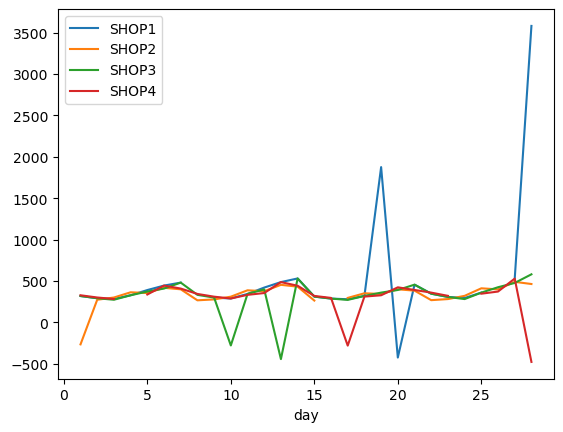

In [81]:
df_clicks.plot()

<Axes: xlabel='day'>

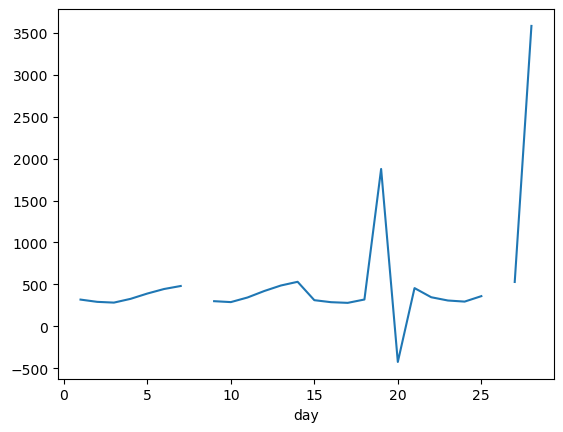

In [82]:
df_clicks['SHOP1'].plot()

In [83]:
df_clicks = df_clicks.fillna(df_clicks.mean().mean())

<Axes: xlabel='day'>

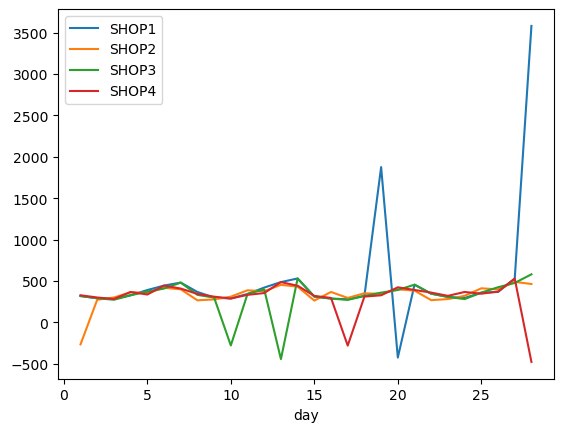

In [84]:
df_clicks.plot()

In [85]:
mean_val = df_clicks.values.mean()
std_val = df_clicks.values.std()
# std_deviation_interval

In [88]:
print(f'({mean_val:.2f} - {std_val:.2f}, {mean_val:.2f} + {std_val:.2f})')

(366.62 - 382.30, 366.62 + 382.30)


In [89]:
standard_mask = (df_clicks >= 10) & (df_clicks < mean_val + std_val)

In [90]:
df_clicks = df_clicks.where(standard_mask, mean_val)

<Axes: xlabel='day'>

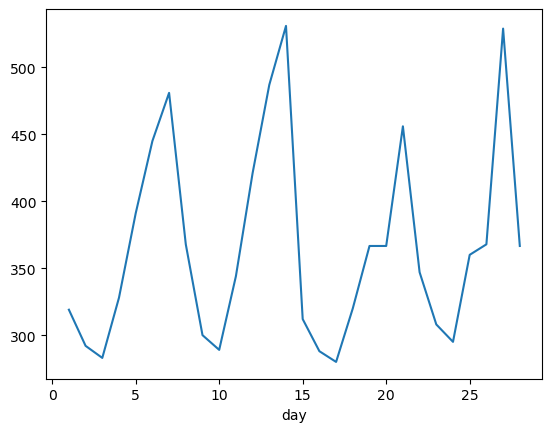

In [92]:
df_clicks['SHOP1'].plot()

<Axes: xlabel='day'>

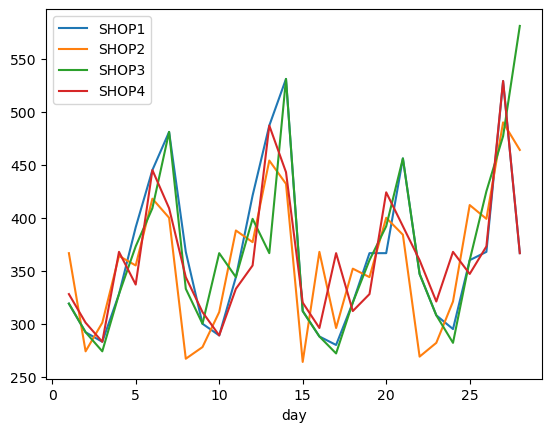

In [93]:
df_clicks.plot()

<Axes: xlabel='day'>

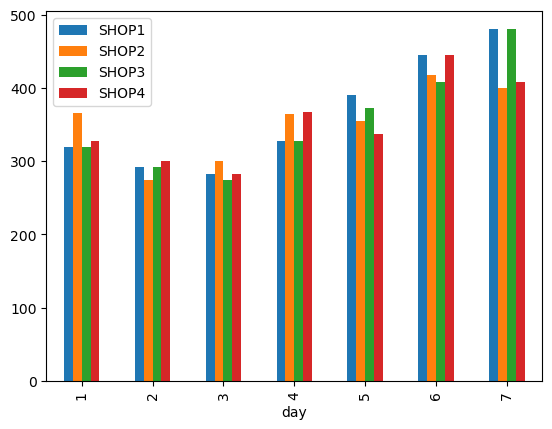

In [94]:
df_clicks[:7].plot(y=['SHOP1', 'SHOP2', 'SHOP3', 'SHOP4'], kind="bar")

<Axes: ylabel='Frequency'>

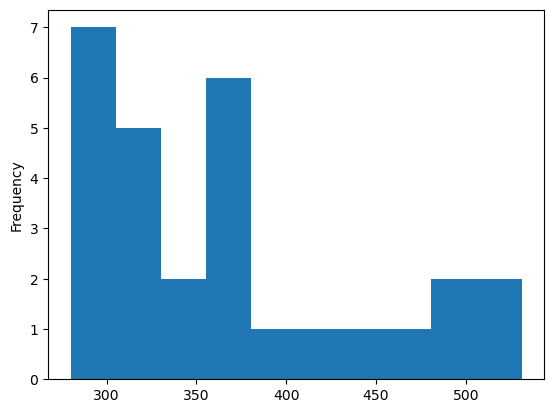

In [95]:
df_clicks['SHOP1'].plot(kind='hist')

<Axes: ylabel='Frequency'>

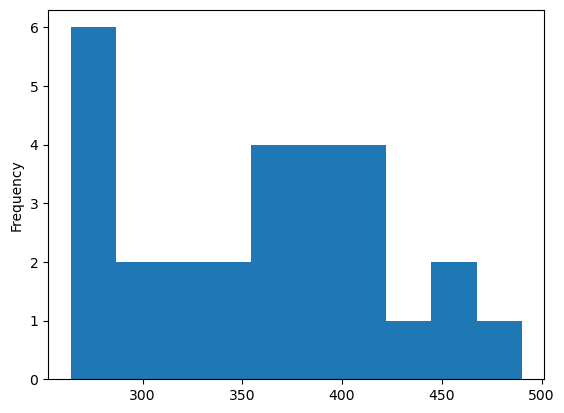

In [96]:
df_clicks['SHOP2'].plot(kind='hist')

In [98]:
df_clicks.sum()

SHOP1    10241.545618
SHOP2    10030.463754
SHOP3    10296.236218
SHOP4    10135.927509
dtype: float64

<Axes: >

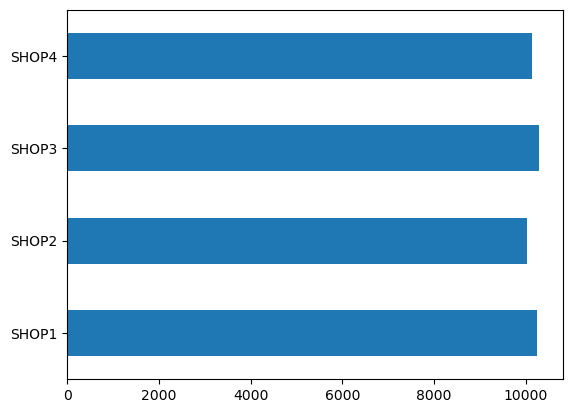

In [97]:
df_clicks.sum().plot(kind="barh", fontsize=10)

<Axes: ylabel='Total clicks'>

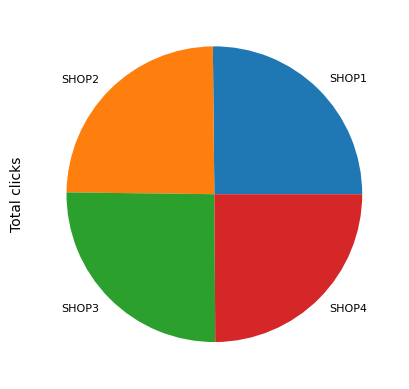

In [99]:
df_clicks.sum().plot(kind="pie", ylabel='Total clicks', fontsize=8)

<Axes: xlabel='SHOP1', ylabel='SHOP2'>

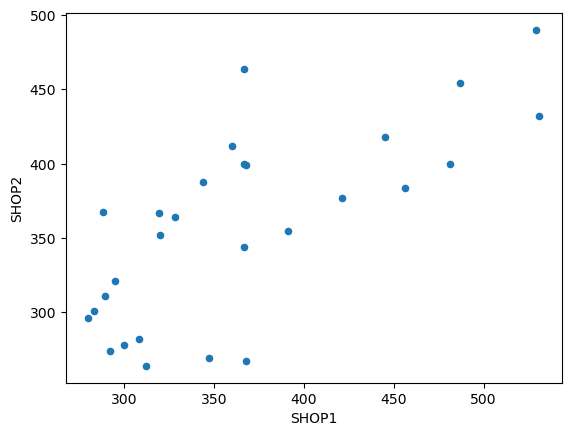

In [100]:
df_clicks.plot(x="SHOP1", y="SHOP2", kind="scatter")

<Axes: xlabel='SHOP1', ylabel='SHOP3'>

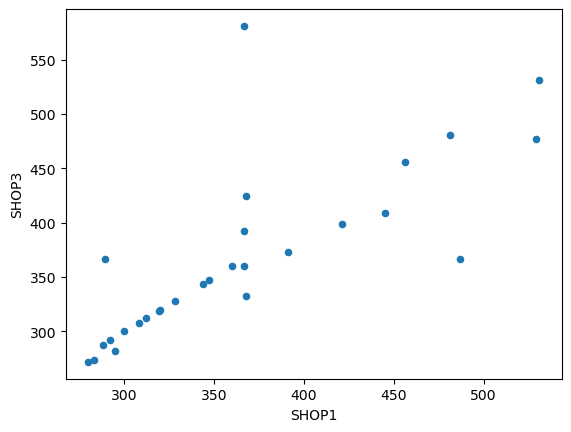

In [101]:
df_clicks.plot(x="SHOP1", y="SHOP3", kind="scatter")

### Упражнения

https://ru.hexlet.io/courses/python-pandas/lessons/visual-tips/exercise_unit

https://ru.hexlet.io/code_reviews/1568699

In [31]:
import numpy as np


def read_and_plot(path):
    '''Принимает путь до файла, читает данные и выводит линейные графики'''
    df = pd.read_csv(path, index_col=0)
    df.plot()


def clean_plot(path):
    df = pd.read_csv(path, index_col=0)
    cleaned_df = _fill_negative_with_min_positive(df)
    cleaned_df.plot()


def max_plot(path):
    df = pd.read_csv(path, index_col=0)
    max_per_shop = df.max(axis=0)
    max_per_shop.plot(kind="pie")


def _fill_negative_with_min_positive(df):
    min_among_positive = df.where(~(df < 0), np.nan).min().min()
    return df.where(df >= 0, min_among_positive)

In [14]:
DATA_PATH = 'data/Cite_clicks.csv'
df = pd.read_csv(DATA_PATH, index_col=0)

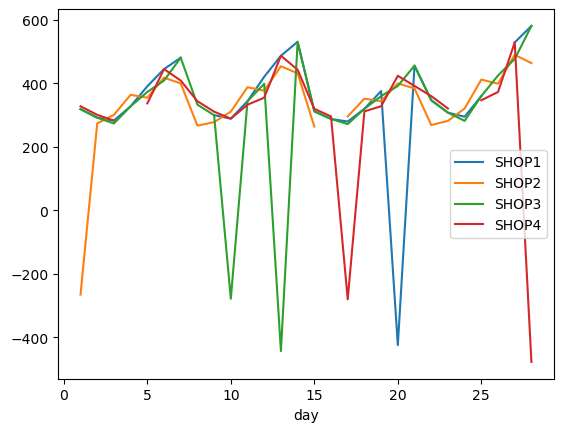

In [7]:
read_and_plot(DATA_PATH)

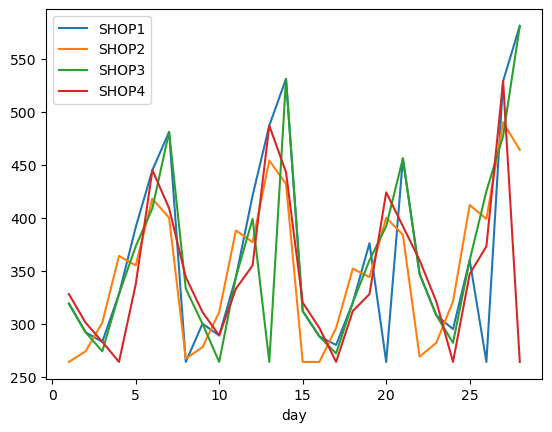

In [32]:
clean_plot(DATA_PATH)

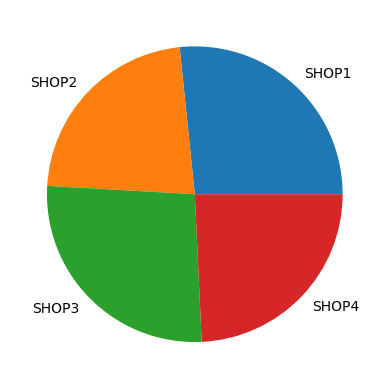

In [27]:
max_plot(DATA_PATH)

## Сводные таблицы

In [24]:
df_clicks = pd.read_csv('./data/Cite_clicks_info.csv', index_col=0)
df_clicks.head()

,SHOP1,SHOP2,SHOP3,SHOP4,Advertising,Size
day,,,,,,
1,319.0,-265.0,319.0,328.0,small,big
2,292.0,274.0,292.0,301.0,medium,small
3,283.0,301.0,274.0,283.0,medium,small
4,328.0,364.0,328.0,NaN,small,small
5,391.0,355.0,373.0,337.0,small,small


In [27]:
df_clicks.drop(['Advertising', 'Size'], axis=1).agg('mean')

SHOP1    343.807692
SHOP2    334.481481
SHOP3    315.785714
SHOP4    304.230769
dtype: float64

In [31]:
df_clicks.drop(['Advertising', 'Size'], axis=1).mean()

SHOP1    343.807692
SHOP2    334.481481
SHOP3    315.785714
SHOP4    304.230769
dtype: float64

In [36]:
dict_func = {'SHOP1': ['mean', 'max', 'min'],
             'SHOP2': ['mean', 'max', 'sum'],
             'SHOP3': ['mean', 'max'],
             'SHOP4': ['mean', 'max'],
             'Advertising' : ['count']}

In [37]:
df_clicks.agg(dict_func)

,SHOP1,SHOP2,SHOP3,SHOP4,Advertising
mean,343.807692,334.481481,315.785714,304.230769,NaN
max,581.000000,490.000000,581.000000,529.000000,NaN
min,-424.000000,NaN,NaN,NaN,NaN
sum,NaN,9031.000000,NaN,NaN,NaN
count,NaN,NaN,NaN,NaN,28.0


In [39]:
df_clicks.agg(shop1_mean=('SHOP1', 'mean'),
              shop2_mean=('SHOP2', 'mean'),
              advertising_count=('Advertising', 'count'))

,SHOP1,SHOP2,Advertising
shop1_mean,343.807692,NaN,NaN
shop2_mean,NaN,334.481481,NaN
advertising_count,NaN,NaN,28.0


In [40]:
df_clicks.groupby(['Advertising']).agg(['mean', 'median'])

/tmp/ipykernel_42500/1379168344.py:1: FutureWarning: ['Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_clicks.groupby(['Advertising']).agg(['mean', 'median'])


SHOP1              SHOP2              SHOP3         \
                   mean median        mean median        mean median   
Advertising                                                            
large        289.000000  304.0  352.444444  321.0  361.100000  310.0   
medium       361.142857  320.0  344.666667  344.0  196.000000  320.0   
small        391.222222  360.0  306.333333  384.0  385.222222  360.0   

                  SHOP4         
                   mean median  
Advertising                     
large        199.888889  320.0  
medium       347.333333  328.0  
small        373.125000  353.5

In [41]:
agg_func = {'SHOP1': ['mean','max'], 'SHOP2': ['min', 'median'], 'SHOP3':['std', 'var'], 'SHOP4': ['min', 'max']}
df_clicks.groupby(['Advertising']).agg(agg_func).round(2)

SHOP1         SHOP2          SHOP3             SHOP4       
               mean    max    min median     std        var    min    max
Advertising                                                              
large        289.00  581.0  264.0  321.0  101.48   10298.10 -477.0  529.0
medium       361.14  487.0  267.0  344.0  324.62  105375.50  283.0  487.0
small        391.22  531.0 -265.0  384.0   69.31    4803.94  328.0  445.0

In [42]:
agg_func = {'SHOP1': ['first', 'last']}
df_clicks.sort_values(by='SHOP1').groupby('Advertising').agg(agg_func)

SHOP1       
             first   last
Advertising              
large       -424.0  581.0
medium       283.0  487.0
small        319.0  531.0

In [43]:
df_clicks.sort_values(by='SHOP1')

,SHOP1,SHOP2,SHOP3,SHOP4,Advertising,Size
day,,,,,,
20,-424.0,400.0,392.0,424.0,large,big
17,280.0,296.0,272.0,-280.0,large,big
3,283.0,301.0,274.0,283.0,medium,small
16,288.0,NaN,288.0,296.0,large,small
10,289.0,311.0,-278.0,289.0,medium,small
2,292.0,274.0,292.0,301.0,medium,small
24,295.0,321.0,282.0,NaN,large,big
9,300.0,278.0,300.0,311.0,large,small
23,308.0,282.0,308.0,321.0,large,small


### Упражнения

https://ru.hexlet.io/courses/python-pandas/lessons/pivot-tables/exercise_unit

https://ru.hexlet.io/code_reviews/1569942

In [17]:
def get_max(df):
    return df.agg('max')


def get_max_for_category(df):
    return df.groupby(['Advertising']).agg('max')


def get_median_for_category(df):
    return df.groupby(['Size']).median(numeric_only=True)

In [6]:
orders_path = './data/Cite_clicks_info.csv'
test_df = pd.read_csv(orders_path)
test_df.head()

,day,SHOP1,SHOP2,SHOP3,SHOP4,Advertising,Size
0,1,319.0,-265.0,319.0,328.0,small,big
1,2,292.0,274.0,292.0,301.0,medium,small
2,3,283.0,301.0,274.0,283.0,medium,small
3,4,328.0,364.0,328.0,NaN,small,small
4,5,391.0,355.0,373.0,337.0,small,small


In [9]:
get_max(test_df)

day               28
SHOP1          581.0
SHOP2          490.0
SHOP3          581.0
SHOP4          529.0
Advertising    small
Size           small
dtype: object

In [13]:
get_max_for_category(test_df)

,day,SHOP1,SHOP2,SHOP3,SHOP4,Size
Advertising,,,,,,
large,28,581.0,490.0,581.0,529.0,small
medium,26,487.0,454.0,481.0,487.0,small
small,25,531.0,432.0,531.0,445.0,small


In [18]:
get_median_for_category(test_df)

,day,SHOP1,SHOP2,SHOP3,SHOP4
Size,,,,,
big,22.0,319.0,321.0,347.0,345.5
small,12.0,344.0,359.5,328.0,330.5


## Изменение формы и объединение таблиц

In [20]:
df_clicks = pd.read_csv('./data/Cite_clicks.csv', index_col=0)
df_clicks.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [22]:
df_clicks_first_week = df_clicks[:7]
df_clicks_first_week.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [23]:
df_clicks_second_week = df_clicks[7:14]
df_clicks_second_week.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
8,NaN,267.0,333.0,344.0
9,300.0,278.0,300.0,311.0
10,289.0,311.0,-278.0,289.0
11,344.0,388.0,344.0,333.0
12,421.0,377.0,399.0,355.0


In [25]:
df_weeks_concat = pd.concat([
    df_clicks_first_week,
    df_clicks_second_week
])

In [26]:
df_clicks_two_first = df_clicks[['SHOP1', 'SHOP2']]
df_clicks_two_last = df_clicks[['SHOP3', 'SHOP4']]
print(df_clicks_two_first.head(3))
print()
print(df_clicks_two_last.head(3))

     SHOP1  SHOP2
day              
1    319.0 -265.0
2    292.0  274.0
3    283.0  301.0

     SHOP3  SHOP4
day              
1    319.0  328.0
2    292.0  301.0
3    274.0  283.0


In [27]:
df_shop_concat = pd.concat([
    df_clicks_two_first,
    df_clicks_two_last
], axis=1)
df_shop_concat.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [28]:
print(df_clicks_two_first.head(3))
print()
print(df_clicks_two_last.head(3))

     SHOP1  SHOP2
day              
1    319.0 -265.0
2    292.0  274.0
3    283.0  301.0

     SHOP3  SHOP4
day              
1    319.0  328.0
2    292.0  301.0
3    274.0  283.0


In [30]:
df_clicks_two_first = df_clicks[['SHOP1', 'SHOP2']][:5]
df_clicks_two_last = df_clicks[['SHOP3', 'SHOP4']][2:7]
print(df_clicks_two_first)
print()
print(df_clicks_two_last)

     SHOP1  SHOP2
day              
1    319.0 -265.0
2    292.0  274.0
3    283.0  301.0
4    328.0  364.0
5    391.0  355.0

     SHOP3  SHOP4
day              
3    274.0  283.0
4    328.0    NaN
5    373.0  337.0
6    409.0  445.0
7    481.0  409.0


In [31]:
df_concat = pd.concat([
    df_clicks_two_first,
    df_clicks_two_last
],axis=1)

df_concat

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,NaN,NaN
2,292.0,274.0,NaN,NaN
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0
6,NaN,NaN,409.0,445.0
7,NaN,NaN,481.0,409.0


In [32]:
df_join_to_first = df_clicks_two_first.join(
    df_clicks_two_last
)

df_join_to_first

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,NaN,NaN
2,292.0,274.0,NaN,NaN
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [33]:
df_join_to_last = df_clicks_two_last.join(
    df_clicks_two_first
)

df_join_to_last

,SHOP3,SHOP4,SHOP1,SHOP2
day,,,,
3,274.0,283.0,283.0,301.0
4,328.0,NaN,328.0,364.0
5,373.0,337.0,391.0,355.0
6,409.0,445.0,NaN,NaN
7,481.0,409.0,NaN,NaN


In [34]:
print('left join:')
print(df_clicks_two_first.join(
    df_clicks_two_last,
    how='left'
))
print('right join:')
print(df_clicks_two_first.join(
    df_clicks_two_last,
    how='right'
))

print('inner join:')
print(df_clicks_two_first.join(
    df_clicks_two_last,
    how='inner'
))

print('outer join:')
print(df_clicks_two_first.join(
    df_clicks_two_last,
    how='outer'
))

left join:
     SHOP1  SHOP2  SHOP3  SHOP4
day                            
1    319.0 -265.0    NaN    NaN
2    292.0  274.0    NaN    NaN
3    283.0  301.0  274.0  283.0
4    328.0  364.0  328.0    NaN
5    391.0  355.0  373.0  337.0
right join:
     SHOP1  SHOP2  SHOP3  SHOP4
day                            
3    283.0  301.0  274.0  283.0
4    328.0  364.0  328.0    NaN
5    391.0  355.0  373.0  337.0
6      NaN    NaN  409.0  445.0
7      NaN    NaN  481.0  409.0
inner join:
     SHOP1  SHOP2  SHOP3  SHOP4
day                            
3    283.0  301.0  274.0  283.0
4    328.0  364.0  328.0    NaN
5    391.0  355.0  373.0  337.0
outer join:
     SHOP1  SHOP2  SHOP3  SHOP4
day                            
1    319.0 -265.0    NaN    NaN
2    292.0  274.0    NaN    NaN
3    283.0  301.0  274.0  283.0
4    328.0  364.0  328.0    NaN
5    391.0  355.0  373.0  337.0
6      NaN    NaN  409.0  445.0
7      NaN    NaN  481.0  409.0


In [36]:
df_clicks.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [37]:
df_clicks = df_clicks.reset_index()
df_clicks.head()

,day,SHOP1,SHOP2,SHOP3,SHOP4
0,1,319.0,-265.0,319.0,328.0
1,2,292.0,274.0,292.0,301.0
2,3,283.0,301.0,274.0,283.0
3,4,328.0,364.0,328.0,NaN
4,5,391.0,355.0,373.0,337.0


In [38]:
df_clicks_two_first = df_clicks[['day', 'SHOP1', 'SHOP2']][:5]
df_clicks_two_last = df_clicks[['day', 'SHOP3', 'SHOP4']][2:7]
print(df_clicks_two_first)
print()
print(df_clicks_two_last)

   day  SHOP1  SHOP2
0    1  319.0 -265.0
1    2  292.0  274.0
2    3  283.0  301.0
3    4  328.0  364.0
4    5  391.0  355.0

   day  SHOP3  SHOP4
2    3  274.0  283.0
3    4  328.0    NaN
4    5  373.0  337.0
5    6  409.0  445.0
6    7  481.0  409.0


In [39]:
df_merged = pd.merge(
    df_clicks_two_first, df_clicks_two_last,
    left_on='day',
    right_on='day'
)

df_merged

,day,SHOP1,SHOP2,SHOP3,SHOP4
0,3,283.0,301.0,274.0,283.0
1,4,328.0,364.0,328.0,NaN
2,5,391.0,355.0,373.0,337.0


In [40]:
print('inner merge:')
print(pd.merge(
    df_clicks_two_first, df_clicks_two_last,
    left_on='day',
    right_on='day',
    how='inner'
))

print('left merge:')
print(pd.merge(
    df_clicks_two_first, df_clicks_two_last,
    left_on='day',
    right_on='day',
    how='left'
))

print('right merge:')
print(pd.merge(
    df_clicks_two_first, df_clicks_two_last,
    left_on='day',
    right_on='day',
    how='right'
))

print('outer merge:')
print(pd.merge(
    df_clicks_two_first, df_clicks_two_last,
    left_on='day',
    right_on='day',
    how='outer'
))

inner merge:
   day  SHOP1  SHOP2  SHOP3  SHOP4
0    3  283.0  301.0  274.0  283.0
1    4  328.0  364.0  328.0    NaN
2    5  391.0  355.0  373.0  337.0
left merge:
   day  SHOP1  SHOP2  SHOP3  SHOP4
0    1  319.0 -265.0    NaN    NaN
1    2  292.0  274.0    NaN    NaN
2    3  283.0  301.0  274.0  283.0
3    4  328.0  364.0  328.0    NaN
4    5  391.0  355.0  373.0  337.0
right merge:
   day  SHOP1  SHOP2  SHOP3  SHOP4
0    3  283.0  301.0  274.0  283.0
1    4  328.0  364.0  328.0    NaN
2    5  391.0  355.0  373.0  337.0
3    6    NaN    NaN  409.0  445.0
4    7    NaN    NaN  481.0  409.0
outer merge:
   day  SHOP1  SHOP2  SHOP3  SHOP4
0    1  319.0 -265.0    NaN    NaN
1    2  292.0  274.0    NaN    NaN
2    3  283.0  301.0  274.0  283.0
3    4  328.0  364.0  328.0    NaN
4    5  391.0  355.0  373.0  337.0
5    6    NaN    NaN  409.0  445.0
6    7    NaN    NaN  481.0  409.0


### Упражнения

In [23]:
def concat(df1, df2):
    return pd.concat([df1, df2], axis=1)


def join_intersect(df1, df2):
    return df1.join(df2, how='inner')


def merge_all(df1, df2):
    return pd.merge(
        df1, df2, left_on='day', right_on='day', how='outer')

https://ru.hexlet.io/courses/python-pandas/lessons/form-change/exercise_unit

https://ru.hexlet.io/code_reviews/1571127

In [5]:
df_clicks = pd.read_csv('./data/Cite_clicks.csv', index_col=0)
test_df = df_clicks
df_clicks.head()

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0


In [13]:
test_df1 = test_df.loc[:2, ['SHOP1', 'SHOP2']]
test_df2 = test_df.loc[:2, ['SHOP3', 'SHOP4']]
print(test_df1)
print()
print(test_df2)

     SHOP1  SHOP2
day              
1    319.0 -265.0
2    292.0  274.0

     SHOP3  SHOP4
day              
1    319.0  328.0
2    292.0  301.0


In [19]:
concat(test_df1, test_df2)

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0


In [20]:
test_df1 = test_df.loc[:3, ['SHOP1', 'SHOP2']]
test_df2 = test_df.loc[2:4, ['SHOP3', 'SHOP4']]
print(test_df1)
print()
print(test_df2)

     SHOP1  SHOP2
day              
1    319.0 -265.0
2    292.0  274.0
3    283.0  301.0

     SHOP3  SHOP4
day              
2    292.0  301.0
3    274.0  283.0
4    328.0    NaN


In [22]:
join_intersect(test_df1, test_df2)

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0


In [24]:
merge_all(test_df1, test_df2)

,SHOP1,SHOP2,SHOP3,SHOP4
day,,,,
1,319.0,-265.0,NaN,NaN
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,NaN,NaN,328.0,NaN


## Работа с Excel-файлами в Pandas 

In [3]:
df_orders = pd.read_excel('./data/Shop_orders.xlsx', index_col=0)
df_orders

,shop_1,shop_2,shop_3,shop_4
weekday,,,,
mon,7,1,7,8
tue,4,2,4,5
wed,3,5,2,3
thu,8,12,8,7
fri,15,11,13,9
sat,21,18,17,21
sun,25,16,25,17


In [4]:
df_orders_mean = pd.DataFrame(df_orders.mean()).T.round(1)
df_orders_mean.index = ['mean']
df_orders_mean

,shop_1,shop_2,shop_3,shop_4
mean,11.9,9.3,10.9,10.0


In [5]:
df_analitic_results = pd.concat([
    df_orders,
    df_orders_mean
])
df_analitic_results

,shop_1,shop_2,shop_3,shop_4
mon,7.0,1.0,7.0,8.0
tue,4.0,2.0,4.0,5.0
wed,3.0,5.0,2.0,3.0
thu,8.0,12.0,8.0,7.0
fri,15.0,11.0,13.0,9.0
sat,21.0,18.0,17.0,21.0
sun,25.0,16.0,25.0,17.0
mean,11.9,9.3,10.9,10.0


In [10]:
df_analitic_results.to_excel(
    './data/Shop_orders_with_analytics.xlsx', sheet_name='Total')

In [11]:
df_analitic_results[['shop_1']].to_excel(
    './data/Shop_orders_with_analytics.xlsx', sheet_name='shop_1')

In [9]:
path_for_analytic_results = './data/Shop_orders_with_analytics.xlsx'

In [10]:
with pd.ExcelWriter(
        path_for_analytic_results,
        engine="xlsxwriter",
        mode='w') as excel_writer:
    # Add total df
    df_analitic_results.to_excel(excel_writer, sheet_name='Total')
    # Add all shop df results
    for shop_name in df_analitic_results.columns.to_list():
        df_analitic_results[[shop_name]].to_excel(excel_writer, sheet_name=shop_name)


In [17]:
df_analitic_results_from_file = pd.read_excel(path_for_analytic_results, index_col=0)
df_analitic_results_from_file

,shop_1,shop_2,shop_3,shop_4
mon,7.0,1.0,7.0,8
tue,4.0,2.0,4.0,5
wed,3.0,5.0,2.0,3
thu,8.0,12.0,8.0,7
fri,15.0,11.0,13.0,9
sat,21.0,18.0,17.0,21
sun,25.0,16.0,25.0,17
mean,11.9,9.3,10.9,10


In [28]:
df_analitic_results_from_file = pd.read_excel(path_for_analytic_results, index_col=0, sheet_name='shop_1')
df_analitic_results_from_file

,shop_1
mon,7.0
tue,4.0
wed,3.0
thu,8.0
fri,15.0
sat,21.0
sun,25.0
mean,11.9


In [27]:
excel_reader = pd.ExcelFile(path_for_analytic_results)
df_shop_1 = excel_reader.parse('shop_1', index_col=0)
df_shop_2 = excel_reader.parse('shop_2', index_col=0)
df_shop_2

,shop_2
mon,1.0
tue,2.0
wed,5.0
thu,12.0
fri,11.0
sat,18.0
sun,16.0
mean,9.3


In [22]:
excel_reader.sheet_names

['Total', 'shop_1', 'shop_2', 'shop_3', 'shop_4']

In [25]:
sheet_to_df_map = {sheet_name: excel_reader.parse(sheet_name, index_col=0) for sheet_name in excel_reader.sheet_names} 

In [26]:
sheet_to_df_map['shop_4']

,shop_4
mon,8
tue,5
wed,3
thu,7
fri,9
sat,21
sun,17
mean,10


In [31]:
with pd.ExcelWriter(
        path_for_analytic_results,
        engine="xlsxwriter",
        mode='w') as excel_writer:

    # Add total df
    df_analitic_results.to_excel(excel_writer, sheet_name='Total')

    # Add all shop df results
    for shop_name in df_analitic_results.columns.to_list():
        df_analitic_results[[shop_name]].to_excel(excel_writer, sheet_name=shop_name)
        
    # Formatting total df
    threshold = 11
    workbook = excel_writer.book
    worksheet = excel_writer.sheets['Total']
    format1 = workbook.add_format({'bg_color': '#FFC7CD',
                                   'font_color': '#9C0006'})
    format2 = workbook.add_format({'bg_color': '#C6EFCD',
                                   'font_color': '#006100'})

    worksheet.conditional_format('B2:E9', {
            'type' : 'cell',
            'criteria' : '>=',
            'value' : threshold,
            'format' : format1}
    )
    worksheet.conditional_format('B2:E9', {
            'type' : 'cell',
            'criteria' : '<',
            'value' : threshold,
            'format' : format2}
    )


### Упражнения

https://ru.hexlet.io/courses/python-pandas/lessons/excel-workflow/exercise_unit

https://ru.hexlet.io/code_reviews/1572322

In [84]:
def convert_to_xlsx(xls_path, xlsx_path, skiprows=None):
    tmp_df = pd.read_excel(xls_path, skiprows=skiprows)
    tmp_df.to_excel(xlsx_path, index=False)


def etl_max(input_xlsx, output_xlsx):
    df = pd.read_excel(input_xlsx)
    processed_df = df.fillna(0)
    processed_df.loc['Max'] = processed_df.max()

    with pd.ExcelWriter(
        output_xlsx,
        engine="xlsxwriter",
        mode='w') as excel_writer:
        processed_df.to_excel(excel_writer, sheet_name='All')
        for shop_name in processed_df.columns.to_list():
            processed_df[[shop_name]].to_excel(excel_writer, sheet_name=shop_name)
    
    return processed_df

In [85]:
path = './data/Orders.xls'
df_orders = pd.read_excel(path, index_col=0)
df_orders.head(4)

,Unnamed: 1,Unnamed: 2,Unnamed: 3
4 shops,,,
Orders per shop,NaN,NaN,NaN
shop_1,shop_2,shop_3,shop_4
7,1,7,8
4,2,4,5


In [86]:
convert_to_xlsx(path, './data/Orders_upd.xlsx', 2)
result = etl_max('./data/Orders_upd.xlsx', './data/Orders_upd_upd.xlsx')
result

,shop_1,shop_2,shop_3,shop_4
0,7.0,1.0,7.0,8.0
1,4.0,2.0,4.0,5.0
2,3.0,5.0,0.0,3.0
3,8.0,12.0,8.0,7.0
4,15.0,11.0,13.0,9.0
5,21.0,18.0,17.0,21.0
6,0.0,16.0,25.0,17.0
Max,21.0,18.0,25.0,21.0


In [78]:
result.columns

Index(['shop_1', 'shop_2', 'shop_3', 'shop_4'], dtype='object')